Ridge Regression:

Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../Data/2014outagesJerry.csv")

In [3]:
data.head()

Date  Total_outages  Equipment  Trees  Animals  Lightning  Others  \
0  1/1/14              0          0      0        0          0       0   
1  1/2/14              0          0      0        0          0       0   
2  1/3/14              1          1      0        0          0       0   
3  1/4/14              0          0      0        0          0       0   
4  1/5/14              4          4      0        0          0       0   

   Day_length_hr  Max_temp_F  Avg_Temp_F     ...      Max_windspeed_mph  \
0          8.529          45          42     ...                      8   
1          8.547          51          47     ...                     21   
2          8.566          48          43     ...                     14   
3          8.586          46          40     ...                     10   
4          8.608          47          39     ...                     15   

   Avg_windspeed_mph  Max_windgust_mph  Precipitation_in  Events  Event_fog  \
0                  3                 9              0.01     Fog          1   
1                  7                26              0.00     NaN          0   
2                  6                16              0.00     Fog          1   
3                  6                13              0.00     NaN          0   
4                  8                17              0.00     NaN          0   

   Event_rain  Event_snow  Event_thunderstorm  Event_Hail  
0           0           0                   0           0  
1           0           0                   0           0  
2           0           0                   0           0  
3           0           0                   0           0  
4           0           0                   0           0  

[5 rows x 27 columns]

## Total Outages

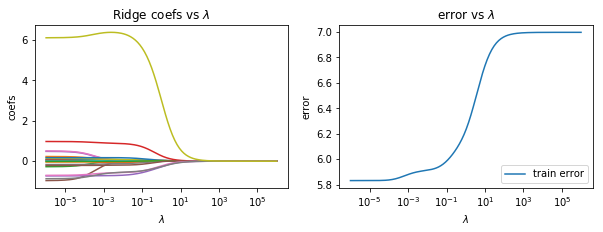

In [4]:
# Select input/output data
Y_tot = data['Total_outages']
X_tot = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_ridge = linear_model.Ridge()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_ridge.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_ridge.fit(X_tot,Y_tot)
    coefs.append(regr_ridge.coef_)
    trainerror.append(mean_squared_error(Y_tot,regr_ridge.predict(X_tot)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('Ridge coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

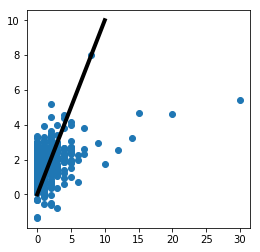

Train error 5.83592078148
R^2 0.166027856496


In [5]:
# pick the best alpha value
regr_ridge_best_tot = linear_model.Ridge()
regr_ridge_best_tot.set_params(alpha=1e-4,normalize=True,max_iter=1e6)
regr_ridge_best_tot.fit(X_tot,Y_tot)
Y_tot_predict = regr_ridge_best_tot.predict(X_tot)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_tot,Y_tot_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_tot,Y_tot_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_ridge_best_tot.score(X_tot,Y_tot))

## Equipment-caused Outages

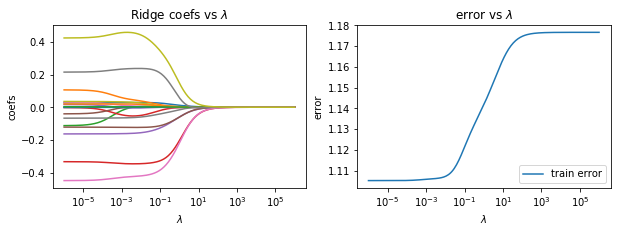

In [6]:
# Select input/output data
Y_eqp = data['Equipment']
X_eqp = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_ridge = linear_model.Ridge()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_ridge.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_ridge.fit(X_eqp,Y_eqp)
    coefs.append(regr_ridge.coef_)
    trainerror.append(mean_squared_error(Y_eqp,regr_ridge.predict(X_eqp)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('Ridge coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

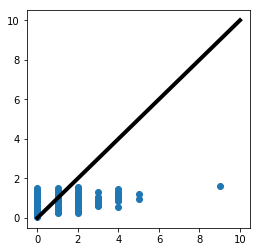

Train error 1.10578623064
R^2 0.0602058576606


In [7]:
# pick the best alpha value
regr_ridge_best_eqp = linear_model.Ridge()
regr_ridge_best_eqp.set_params(alpha=1e-3,normalize=True,max_iter=1e6)
regr_ridge_best_eqp.fit(X_eqp,Y_eqp)
Y_eqp_predict = regr_ridge_best_eqp.predict(X_eqp)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_eqp,Y_eqp_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_eqp,Y_eqp_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_ridge_best_eqp.score(X_eqp,Y_eqp))

## Trees-caused Outages

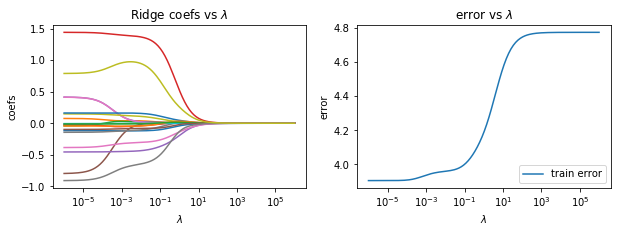

In [8]:
# Select input/output data
Y_tree = data['Trees']
#X_tree = data[['Max_temp_F','Max_humidity_percent','Min_visibility_mi','Max_windspeed_mph','Precipitation_in','Event_Hail']]
X_tree = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_ridge = linear_model.Ridge()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_ridge.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_ridge.fit(X_tree,Y_tree)
    coefs.append(regr_ridge.coef_)
    trainerror.append(mean_squared_error(Y_tree,regr_ridge.predict(X_tree)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('Ridge coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

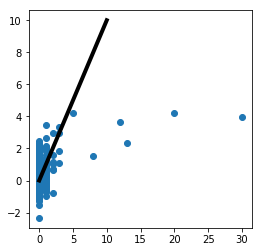

Train error 3.90836072768
R^2 0.181230803426


In [9]:
# pick the best alpha value
regr_ridge_best_tree = linear_model.Ridge()
regr_ridge_best_tree.set_params(alpha=1e-4,normalize=True,max_iter=1e6)
regr_ridge_best_tree.fit(X_tree,Y_tree)
Y_tree_predict = regr_ridge_best_tree.predict(X_tree)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_tree,Y_tree_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_tree,Y_tree_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_ridge_best_tree.score(X_tree,Y_tree))

## Animals-caused Outages

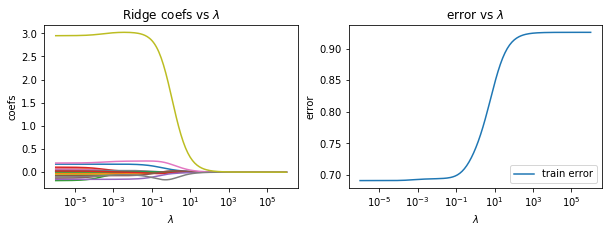

In [10]:
# Select input/output data
Y_ani = data['Animals']
X_ani = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_ridge = linear_model.Ridge()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_ridge.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_ridge.fit(X_ani,Y_ani)
    coefs.append(regr_ridge.coef_)
    trainerror.append(mean_squared_error(Y_ani,regr_ridge.predict(X_ani)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('Ridge coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

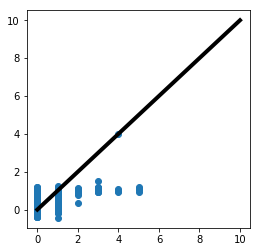

Train error 0.694206053422
R^2 0.250035667636


In [11]:
# pick the best alpha value
regr_ridge_best_ani = linear_model.Ridge()
regr_ridge_best_ani.set_params(alpha=1e-2,normalize=True,max_iter=1e6)
regr_ridge_best_ani.fit(X_ani,Y_ani)
Y_ani_predict = regr_ridge_best_ani.predict(X_ani)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_ani,Y_ani_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_ani,Y_ani_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_ridge_best_ani.score(X_ani,Y_ani))

## Lightning-caused Outages

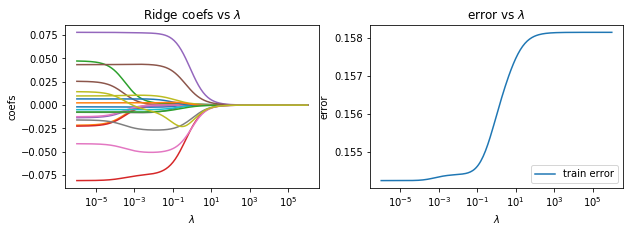

In [12]:
# Select input/output data
Y_lightening = data['Lightning']
X_lightening = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_ridge = linear_model.Ridge()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_ridge.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_ridge.fit(X_lightening,Y_lightening)
    coefs.append(regr_ridge.coef_)
    trainerror.append(mean_squared_error(Y_lightening,regr_ridge.predict(X_lightening)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('Ridge coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

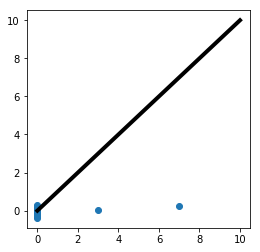

Train error 0.154338664677
R^2 0.0241210915243


In [13]:
# pick the best alpha value
regr_ridge_best_lightening = linear_model.Ridge()
regr_ridge_best_lightening.set_params(alpha=1e-3,normalize=True,max_iter=1e6)
regr_ridge_best_lightening.fit(X_lightening,Y_lightening)
Y_lightening_predict = regr_ridge_best_lightening.predict(X_lightening)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_lightening,Y_lightening_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_lightening,Y_lightening_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_ridge_best_lightening.score(X_lightening,Y_lightening))